<a href="https://colab.research.google.com/github/arpanghosh87/pytorch/blob/main/pytorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import torch
import numpy as np
import pandas as pd
print(torch.__version__)

2.8.0+cu126


Intro to Tensors

In [263]:
# scalar
scalar = torch.tensor(56)
print(scalar)

tensor(56)


In [264]:
# vector
vectors = torch.tensor([5, 6])
vectors.ndim

1

In [265]:
# how many ele per dim
vectors.shape

torch.Size([2])

In [266]:
# Random tensor
randoms = torch.rand(3, 4)
randoms

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

In [267]:
# range
tensor_range = torch.arange(1,15)
tensor_range

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [268]:
# tensor like
ten_zeros = torch.zeros_like(tensor_range)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [269]:
tensor_range.device

device(type='cpu')

torch.matmul for matrix multiplication

Image are represented by tensor of shape (H, W, RGB)

argmin returns the index of min in tensor

reshape, view, squeeze, unsqueeze, stack

In [270]:
color = torch.rand(224, 224, 3)
color_permuted = color.permute(2, 0, 1)
# print(color_permuted[:, :, 5])
# diffn view of same tensor w/ same mem

In [271]:
array = np.arange(1, 9)
ten = torch.from_numpy(array)
array, ten, ten.numpy()

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 tensor([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]))

torch.manual_seed sets manual seed of randomness

In [272]:
torch.cuda.device_count()

0

### Create a new NN

In [273]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [274]:
weight = 0.7
bias = 0.3

# data
start = 0
end =1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
len(X), len(Y)

(50, 50)

In [275]:
train = int(0.8 * len(X))
X_train, Y_train = X[:train], Y[:train]
X_test, Y_test = X[train:], Y[train:]

In [276]:
def plot_predictions(train_data = X_train,
                     train_label = Y_train,
                     test_data = X_test,
                     test_label = Y_test,
                     preditions=None):
  """
  Plots train and test data
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_label, c="g", s=4, label="Test Data")
  if preditions is not None:
    plt.scatter(test_data, preditions, c="r", s=4, label="predictions")

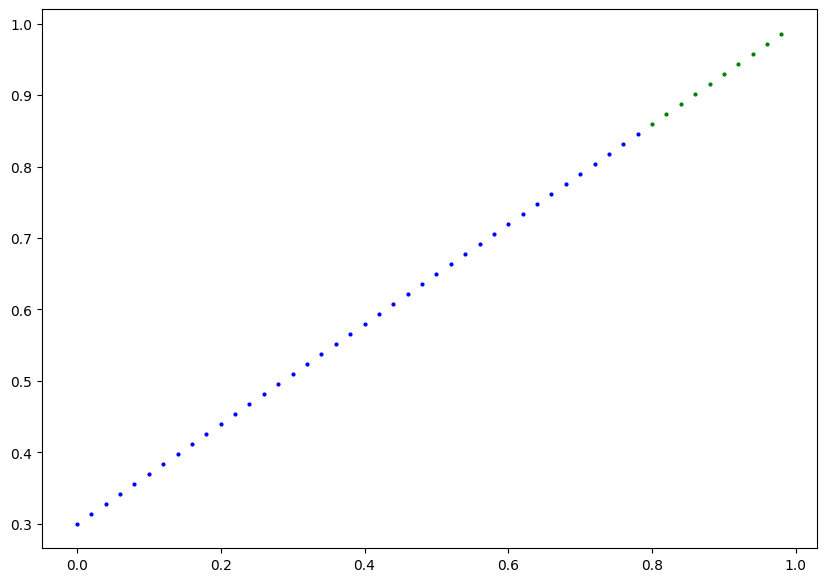

In [277]:
plot_predictions();

In [278]:
# Linear regression
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor): # MUST override subclasses on nn.module
    """ gets value """
    return self.weight * x + self.bias

In [279]:
torch.manual_seed(42)
model_0 = LR()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

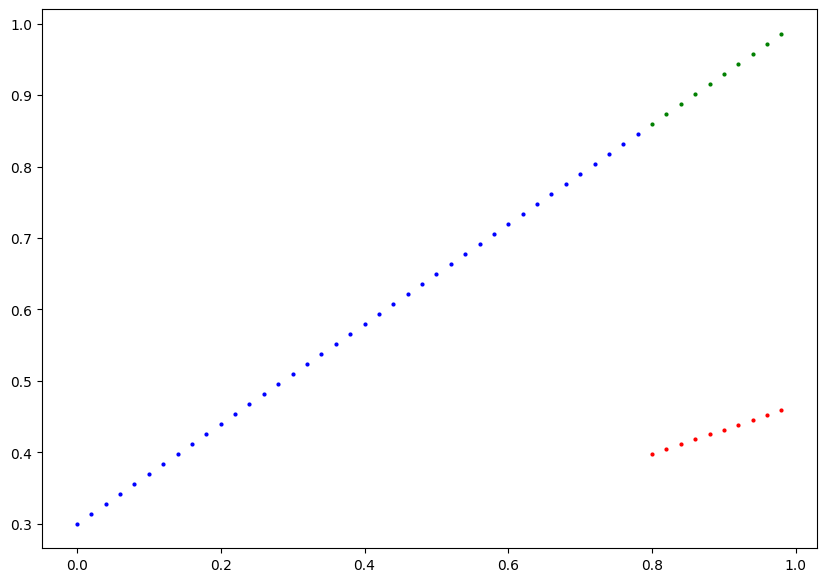

In [280]:
with torch.inference_mode():
  y_preds=model_0(X_test)

plot_predictions(preditions=y_preds)

In [281]:
# Loss fn
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.001)

In [282]:
torch.manual_seed(42)
epochs = 10000
#track experiments
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # train
  model_0.train()
  # forward pass
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, X_train)
  # print(loss)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  # eval - turns off gradient tracking
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, Y_test)
  if(epoch % 10 == 0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    # print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # print(model_0.state_dict())

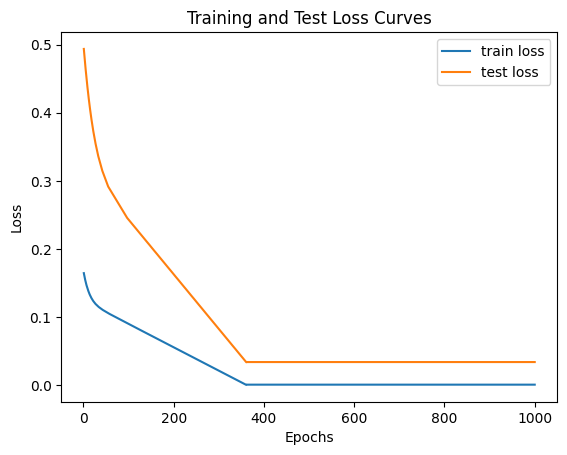

In [283]:
epoch_count = np.arange(1, len(loss_values) + 1)
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).detach().numpy()), label="train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).detach().numpy()), label="test loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

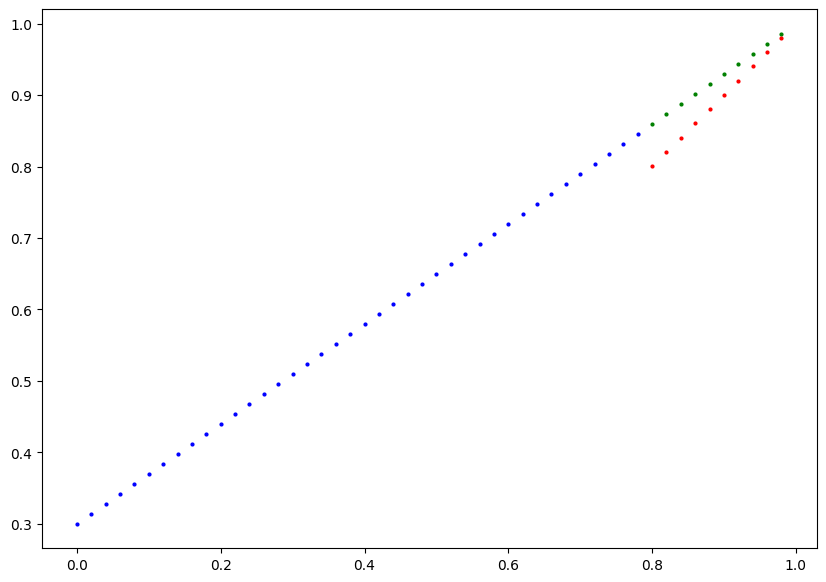

In [284]:
with torch.inference_mode():
  y_preds=model_0(X_test)

plot_predictions(preditions=y_preds)

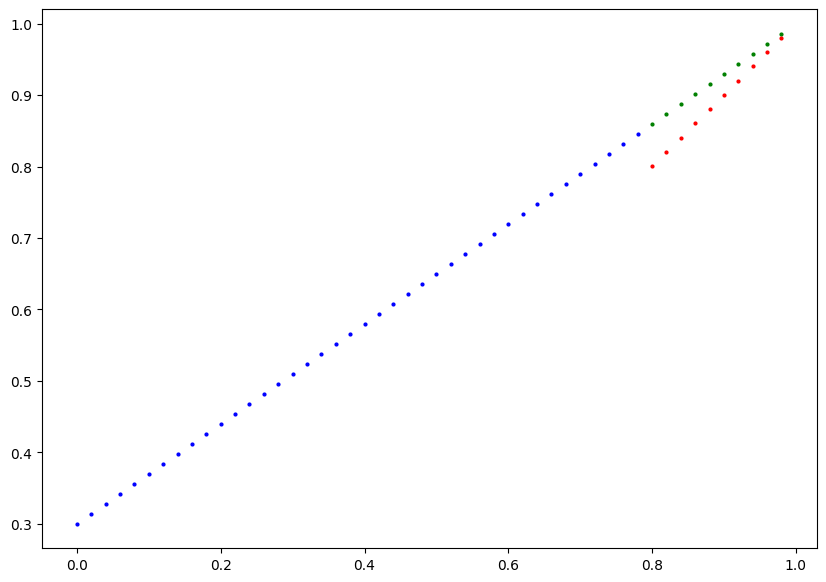

In [285]:
with torch.inference_mode():
  y_preds=model_0(X_test)

plot_predictions(preditions=y_preds)

In [286]:
print(model_0.state_dict())

OrderedDict({'weight': tensor([0.9997]), 'bias': tensor([0.0008])})
